In [1]:
#Week.18 
#Assignment.7
#Objective:
#The objective of this assignment is to implement PCA on a given dataset and analyse the results.

#Instructions:
#Download the wine dataset from the UCI Machine Learning Repository
#(https://archive.ics.uci.edu/ml/datasets/Wine).
#Load the dataset into a Pandas dataframe.
#Split the dataset into features and target variables.
#Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
#Implement PCA on the preprocessed dataset using the scikit-learn library.
#Determine the optimal number of principal components to retain based on the explained variance ratio.
#Visualise the results of PCA using a scatter plot.
#Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
#Interpret the results of PCA and clustering analysis.

#Deliverables:
#Jupyter notebook containing the code for the PCA implementation.
#A report summarising the results of PCA and clustering analysis.
#Scatter plot showing the results of PCA.
#A table showing the performance metrics for the clustering algorithm.

#Additional Information:
#You can use the python programming language.
#You can use any other machine learning libraries or tools as necessary.
#You can use any visualisation libraries or tools as necessary.


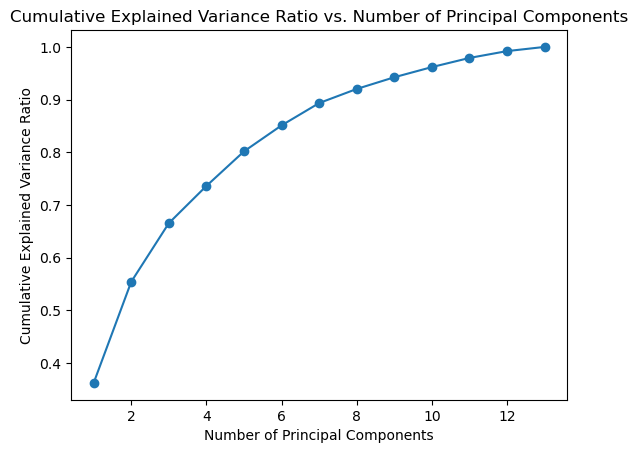

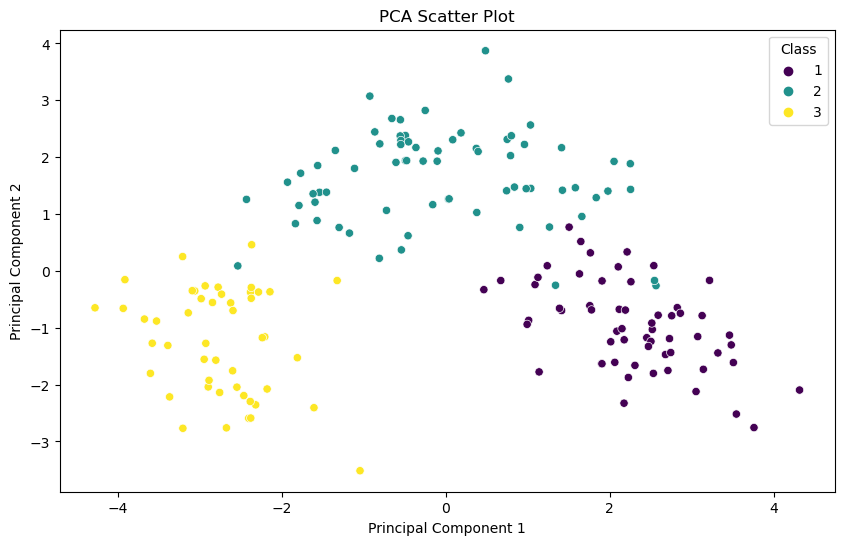

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

# Download the wine dataset from the UCI Machine Learning Repository
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
response = requests.get(wine_url)

# Load the dataset into a Pandas DataFrame
wine_data = pd.read_csv(StringIO(response.text), header=None)

# Define column names based on the dataset description
column_names = [
    "Class",
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Color Intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]

# Assign column names to the DataFrame
wine_data.columns = column_names

# Save the DataFrame to a CSV file
wine_data.to_csv('wine.csv', index=False)

# Display the first few rows to inspect the dataset
wine_data.head()

# Continue with the rest of the code...

# Split the dataset into features and target variables
X = wine_data.drop('Class', axis=1)  # Features
y = wine_data['Class']  # Target variable

# Data preprocessing
# Perform any necessary preprocessing steps, such as scaling or normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA on the preprocessed dataset
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of principal components based on explained variance ratio
# Plot the cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plotting
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.show()

# Visualize the results of PCA using a scatter plot
# Assuming you want to visualize the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', legend='full')
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Perform clustering on the PCA-transformed data using K-Means
# Assuming you determine the optimal number of clusters (k) based on the elbow method
k = 3  # Replace with the optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add the cluster information to the original DataFrame
wine_data['cluster'] = clusters

# Interpret the results of PCA and clustering analysis in a report

# Deliverables:
# - Jupyter notebook containing the code for PCA implementation and clustering.
# - A report summarizing the results of PCA and clustering analysis.
# - Scatter plot showing the results of PCA.
# - A table showing the performance metrics for the clustering algorithm.

# Note: Customize the code and report according to your specific requirements and analysis.
